In [1]:
import os

import numpy
import pandas
import seaborn
import xarray

from src import knn

In [2]:
seaborn.set()
figsize = (12, 5)

In [3]:
data = pandas.read_csv('bootstrapped_dates.csv', index_col=0)

In [4]:
future_ds_path = os.path.join(knn.DATA_STORE_PATH, 'GCMs/Amazon__pr_day_CanESM5_ssp126_r1i1p1f1_gn_20150101-21001231.nc')

In [5]:
observed_location = os.path.join(knn.DATA_STORE_PATH, 'OBSERVATIONS/LLdM_AOI2/catalogo.csv')
locations = pandas.read_csv(observed_location)
lon, lat = locations[locations['CODIGO_CAT'] == 'Beni01'][['longitud', 'latitud']].values[0]

In [6]:
gcm = xarray.open_dataset(future_ds_path)
gcm = knn.shift_longitude_from_360(gcm)
gcm = gcm.sel(lon=lon, lat=lat, method='nearest')

In [7]:
start_date = data.index.min()
end_date = data.index.max()

In [8]:
gcm = gcm.sel(time=slice(start_date, end_date))

In [9]:
gcm_precip = gcm.pr.to_numpy() * (60 * 60 * 24)
data['gcm_precip'] = gcm_precip

<AxesSubplot: >

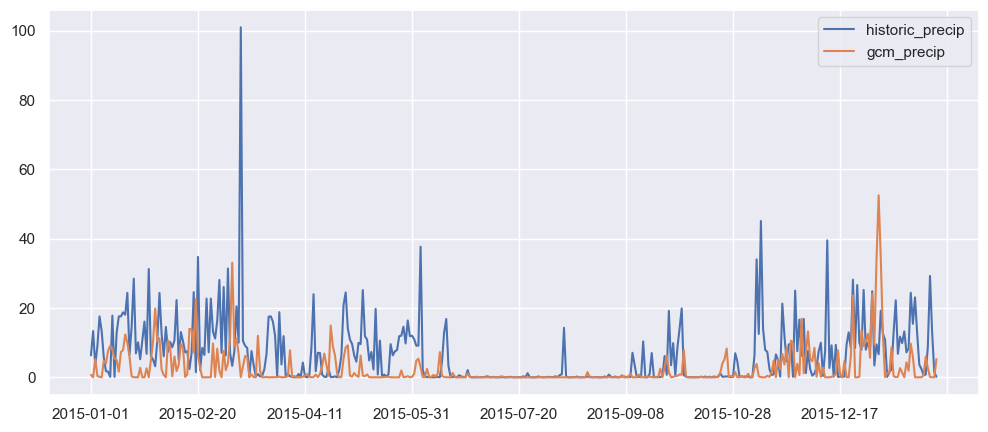

In [10]:
data[['historic_precip', 'gcm_precip']].plot(
    # ylim=(0, 1000),
    figsize=figsize)